In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from statsmodels.api import OLS
import statsmodels.api as sm

In [12]:
data = pd.read_csv('Extracted_Features.csv')
data.head

<bound method NDFrame.head of        ID  PAINTING  mean_fixations_small  mean_saccades_small  \
0       1         1            533.025280           160.423178   
1       1         2            959.141261           118.256765   
2       1         4            618.470264           157.264000   
3       1         6            388.826547           172.173720   
4       1         7            416.682170           191.483547   
...   ...       ...                   ...                  ...   
3433  433        21            413.759201           272.099505   
3434  433        22            713.084441           198.303046   
3435  433        23            532.374389           233.595994   
3436  433        45            562.554638           220.089855   
3437  433        47            541.126109           220.010226   

      mean_diametro_small  min_fixations_small  min_saccades_small  \
0               40.676603           236.200000          233.062500   
1               41.718083           5

In [42]:
def normalize_group(group):
    scaler = StandardScaler()
    group[features] = scaler.fit_transform(group[features])
    return group

# Raggruppa per 'ID' e applica la funzione di normalizzazione
normalized_data = data.groupby('ID').apply(normalize_group)

# Visualizzazione dei risultati
print(normalized_data.head())

       ID  PAINTING  mean_fixations_small  mean_saccades_small  \
ID                                                               
1  9    1        14             -0.643172             0.661496   
   18   1        47              0.938086            -1.319669   
   12   1        18             -0.713479             1.243281   
   4    1         7             -0.675696             0.830897   
   11   1        16             -0.668501             0.796306   

       mean_diametro_small  min_fixations_small  min_saccades_small  \
ID                                                                    
1  9              0.925817            -0.608643           -0.716069   
   18            -0.847919             0.575246            1.014441   
   12             0.744559            -0.620419           -0.910815   
   4              0.715106            -0.618070           -0.625938   
   11             0.826155            -0.615657           -0.939786   

       min_diametro_small  max_fixation

In [53]:
features = ['mean_fixations_small', 'mean_saccades_small', 'mean_diametro_small',
            'min_fixations_small', 'min_saccades_small', 'min_diametro_small',
            'max_fixations_small', 'max_saccades_small', 'max_diametro_small',
            'std_fixations_small', 'std_saccades_small', 'std_diametro_small',
            'num_diff_nonzero_fixations_small', 'num_diff_nonzero_saccades_small',
            'mean_fixations_medium', 'mean_saccades_medium', 'mean_diametro_medium',
            'min_fixations_medium', 'min_saccades_medium', 'min_diametro_medium',
            'max_fixations_medium', 'max_saccades_medium', 'max_diametro_medium',
            'std_fixations_medium', 'std_saccades_medium', 'std_diametro_medium',
            'num_diff_nonzero_fixations_medium', 'num_diff_nonzero_saccades_medium',
            'mean_fixations_full', 'mean_saccades_full', 'mean_diametro_full',
            'min_fixations_full', 'min_saccades_full', 'min_diametro_full',
            'max_fixations_full', 'max_saccades_full', 'max_diametro_full',
            'std_fixations_full', 'std_saccades_full', 'std_diametro_full',
            'num_diff_nonzero_fixations_full', 'num_diff_nonzero_saccades_full']

data['Class'] = data['voto'].apply(lambda x: 0 if x <= 12 else 1 if x <= 25 else 2 if x <= 38 else 3 if x <= 50 else None)
data['Class2'] = data['voto'].apply(lambda x: 0 if x <= 15 else 1 if x <= 35 else 2 if x <= 50 else None)
data['Binary'] = data['voto'].apply(lambda x: 0 if x<=25 else 1)
data['Binary2'] = data['voto'].apply(lambda x: 0 if x<=15 else 1 if x>=35 else 2)

data.head()

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Class,Class2,Binary,Binary2
1167,163,18,2826.240855,88.202934,49.952083,1758.625000,131.1875,45.188963,3743.9375,300.5625,...,2107.830386,123.692382,6.662681,35,77,25,1,1,0,2
1385,184,21,2546.795297,97.077505,45.749835,1329.066667,188.0000,42.333895,3726.1250,331.1875,...,2195.293843,135.929582,9.161643,29,14,13,1,0,0,0
1960,232,20,148.378595,298.234303,38.326457,131.312500,126.5625,36.168243,565.7500,676.5000,...,316.570028,266.086387,19.882504,58,131,19,1,1,0,2
1080,156,22,1990.283964,116.315730,34.568627,566.062500,211.3750,31.052835,3320.4375,446.6875,...,1678.910061,156.164331,7.539028,38,19,16,1,1,0,2
1945,231,23,544.126473,202.186455,34.139307,219.625000,102.9375,31.210755,1544.5000,482.6250,...,932.203004,175.872294,9.457139,62,99,22,1,1,0,2


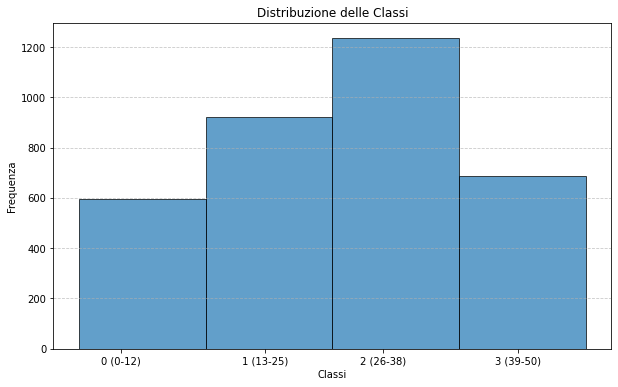

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['Class'].dropna(), bins=4, edgecolor='black', alpha=0.7)
plt.title('Distribuzione delle Classi')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.xticks(ticks=[0.25, 1.1, 1.8, 2.6], labels=['0 (0-12)', '1 (13-25)', '2 (26-38)', '3 (39-50)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Trova il numero minimo di istanze in una delle classi
min_count = data['Class'].value_counts().min()

# Crea un nuovo DataFrame bilanciato
balanced_data = pd.DataFrame()

# Raccolta di subset bilanciati per ogni categoria
subsets = []
for category in data['Class'].unique():
    category_subset = data[data['Class'] == category].sample(n=min_count, random_state=42)
    subsets.append(category_subset)

# Concatenazione dei subset in un unico DataFrame bilanciato
balanced_data = pd.concat(subsets)


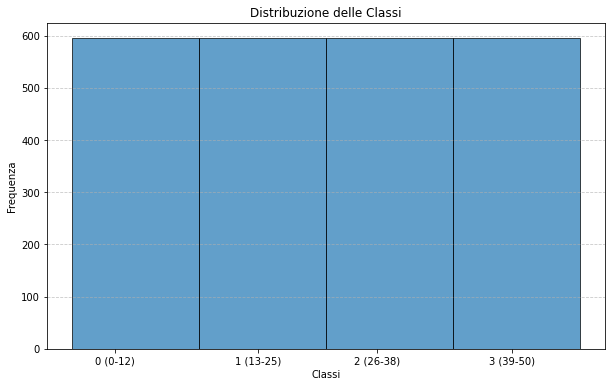

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(balanced_data['Class'].dropna(), bins=4, edgecolor='black', alpha=0.7)
plt.title('Distribuzione delle Classi')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.xticks(ticks=[0.25, 1.1, 1.8, 2.6], labels=['0 (0-12)', '1 (13-25)', '2 (26-38)', '3 (39-50)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'SVM': SVC(kernel='linear', probability=True),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'k-NN': KNeighborsClassifier(n_neighbors=5)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Results for {name}:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("---------------------------------------------------")

initial_counts = balanced_data['Class'].value_counts()
balanced_data = balanced_data.dropna(subset=features + ['Class'])
final_counts = balanced_data['Class'].value_counts()
nan_removed = initial_counts - final_counts
print("NaN rimossi per classe:")
print(nan_removed)

X = balanced_data[features]
y = balanced_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

NaN rimossi per classe:
Class
1    0
2    0
0    0
3    0
Name: count, dtype: int64
Results for Random Forest:
Accuracy: 0.30655391120507397
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.37      0.31       103
           1       0.32      0.30      0.31       126
           2       0.28      0.24      0.26       120
           3       0.37      0.32      0.34       124

    accuracy                           0.31       473
   macro avg       0.31      0.31      0.31       473
weighted avg       0.31      0.31      0.31       473

---------------------------------------------------
Results for SVM:
Accuracy: 0.26849894291754756
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.45      0.37       103
           1       0.21      0.13      0.16       126
           2       0.26      0.18      0.21       120
           3       0.27      0.35      0.30       124

    acc

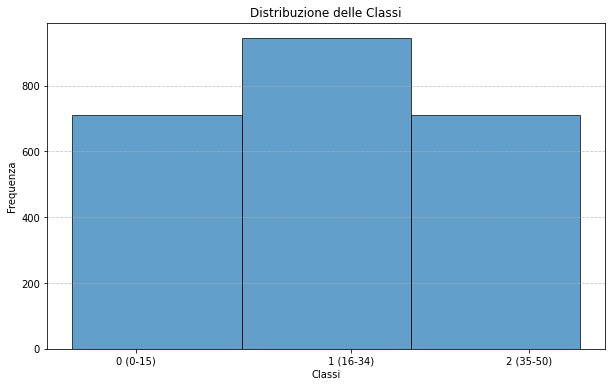

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(data['Class2'].dropna(), bins=3, edgecolor='black', alpha=0.7)
plt.title('Distribuzione delle Classi')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.xticks(ticks=[0.25, 1.1, 1.8], labels=['0 (0-15)', '1 (16-34)', '2 (35-50)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
X = data[features]
y = data['Class2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

Results for Random Forest:
Accuracy: 0.40380549682875266
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.29      0.32       136
           1       0.43      0.57      0.49       190
           2       0.39      0.30      0.34       147

    accuracy                           0.40       473
   macro avg       0.39      0.38      0.38       473
weighted avg       0.40      0.40      0.39       473

---------------------------------------------------
Results for SVM:
Accuracy: 0.39323467230443976
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.03       136
           1       0.41      0.96      0.57       190
           2       0.11      0.01      0.02       147

    accuracy                           0.39       473
   macro avg       0.28      0.33      0.21       473
weighted avg       0.29      0.39      0.24       473

------------------------------------

In [38]:
X = data[features]
y = data['Class']

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_shape=(len(features),), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
152/152 [==============================] - 3s 8ms/step - loss: 1.6565 - accuracy: 0.2626 - val_loss: 1.4026 - val_accuracy: 0.2586
Epoch 2/50
152/152 [==============================] - 1s 6ms/step - loss: 1.4860 - accuracy: 0.2599 - val_loss: 1.3847 - val_accuracy: 0.2559
Epoch 3/50
152/152 [==============================] - 1s 7ms/step - loss: 1.4380 - accuracy: 0.2540 - val_loss: 1.3790 - val_accuracy: 0.2612
Epoch 4/50
152/152 [==============================] - 1s 7ms/step - loss: 1.4090 - accuracy: 0.2712 - val_loss: 1.3801 - val_accuracy: 0.2639
Epoch 5/50
152/152 [==============================] - 1s 8ms/step - loss: 1.4092 - accuracy: 0.2560 - val_loss: 1.3843 - val_accuracy: 0.2401
Epoch 6/50
152/152 [==============================] - 1s 8ms/step - loss: 1.3945 - accuracy: 0.2705 - val_loss: 1.3844 - val_accuracy: 0.2427
Epoch 7/50
152/152 [==============================] - 2s 10ms/step - loss: 1.3828 - accuracy: 0.2864 - val_loss: 1.3813 - val_accuracy: 0.2401
Epoch

KeyboardInterrupt: 

In [39]:
X = data[features]
y = data['Class2']

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_shape=(len(features),), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
152/152 [==============================] - 3s 9ms/step - loss: 1.3353 - accuracy: 0.3373 - val_loss: 1.0936 - val_accuracy: 0.3852
Epoch 2/50
152/152 [==============================] - 1s 6ms/step - loss: 1.1768 - accuracy: 0.3552 - val_loss: 1.0850 - val_accuracy: 0.4274
Epoch 3/50
152/152 [==============================] - 1s 9ms/step - loss: 1.1265 - accuracy: 0.3704 - val_loss: 1.0822 - val_accuracy: 0.4380
Epoch 4/50
152/152 [==============================] - 1s 7ms/step - loss: 1.1208 - accuracy: 0.3757 - val_loss: 1.0806 - val_accuracy: 0.4248
Epoch 5/50
152/152 [==============================] - 1s 7ms/step - loss: 1.1091 - accuracy: 0.3816 - val_loss: 1.0799 - val_accuracy: 0.4248
Epoch 6/50
152/152 [==============================] - 1s 7ms/step - loss: 1.1024 - accuracy: 0.3796 - val_loss: 1.0794 - val_accuracy: 0.4090
Epoch 7/50
152/152 [==============================] - 1s 7ms/step - loss: 1.0939 - accuracy: 0.3935 - val_loss: 1.0778 - val_accuracy: 0.4248
Epoch 

In [40]:
class_counts = data['Class'].value_counts()
total_instances = len(data)
class_percentages = (class_counts / total_instances) * 100
print("Percentuali di ciascuna classe nel dataset:")
print(class_percentages)

Percentuali di ciascuna classe nel dataset:
Class
1    25.042301
2    25.042301
0    25.042301
3    24.873096
Name: count, dtype: float64


In [41]:
class_counts = data['Class2'].value_counts()
total_instances = len(data)
class_percentages = (class_counts / total_instances) * 100
print("Percentuali di ciascuna classe nel dataset:")
print(class_percentages)

Percentuali di ciascuna classe nel dataset:
Class2
1    39.932318
2    30.076142
0    29.991540
Name: count, dtype: float64


In [43]:
X = normalized_data[features]
y = normalized_data['Class2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

Results for Random Forest:
Accuracy: 0.36363636363636365
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.15      0.21       155
           1       0.40      0.67      0.50       186
           2       0.28      0.17      0.21       132

    accuracy                           0.36       473
   macro avg       0.33      0.33      0.31       473
weighted avg       0.34      0.36      0.32       473

---------------------------------------------------
Results for SVM:
Accuracy: 0.39323467230443976
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       155
           1       0.39      1.00      0.56       186
           2       0.00      0.00      0.00       132

    accuracy                           0.39       473
   macro avg       0.13      0.33      0.19       473
weighted avg       0.15      0.39      0.22       473

------------------------------------

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Logistic Regression:
Accuracy: 0.3890063424947146
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.16      0.22       155
           1       0.41      0.76      0.53       186
           2       0.33      0.14      0.19       132

    accuracy                           0.39       473
   macro avg       0.36      0.35      0.31       473
weighted avg       0.37      0.39      0.33       473

---------------------------------------------------
Results for k-NN:
Accuracy: 0.3594080338266385
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.37      0.35       155
           1       0.42      0.52      0.46       186
           2       0.24      0.13      0.17       132

    accuracy                           0.36       473
   macro avg       0.33      0.34      0.33       473
weighted avg       0.34      0.36      0.34       473

-------------------------------

In [44]:
X = data[features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

Results for Random Forest:
Accuracy: 0.3171247357293869
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.41      0.34       103
           1       0.31      0.30      0.31       126
           2       0.28      0.23      0.26       120
           3       0.38      0.34      0.36       124

    accuracy                           0.32       473
   macro avg       0.32      0.32      0.32       473
weighted avg       0.32      0.32      0.32       473

---------------------------------------------------
Results for SVM:
Accuracy: 0.26849894291754756
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.45      0.37       103
           1       0.21      0.13      0.16       126
           2       0.26      0.18      0.21       120
           3       0.27      0.35      0.30       124

    accuracy                           0.27       473
   macro avg       0.26      0.28     

In [54]:
X = data[features]
y = data['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

Results for Random Forest:
Accuracy: 0.5687103594080338
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60       229
           1       0.60      0.48      0.54       244

    accuracy                           0.57       473
   macro avg       0.57      0.57      0.57       473
weighted avg       0.57      0.57      0.57       473

---------------------------------------------------
Results for SVM:
Accuracy: 0.5116279069767442
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       229
           1       0.53      0.48      0.50       244

    accuracy                           0.51       473
   macro avg       0.51      0.51      0.51       473
weighted avg       0.51      0.51      0.51       473

---------------------------------------------------
Results for Logistic Regression:
Accuracy: 0.5031712473572939
Classification Report:
         

In [56]:
datat = data[data['Binary2'] != 2]

X = datat[features]
y = datat['Binary2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

Results for Random Forest:
Accuracy: 0.5918367346938775
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       149
           1       0.58      0.64      0.61       145

    accuracy                           0.59       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.59      0.59      0.59       294

---------------------------------------------------
Results for SVM:
Accuracy: 0.5136054421768708
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       149
           1       0.51      0.59      0.55       145

    accuracy                           0.51       294
   macro avg       0.52      0.51      0.51       294
weighted avg       0.52      0.51      0.51       294

---------------------------------------------------
Results for Logistic Regression:
Accuracy: 0.5238095238095238
Classification Report:
         